In [1]:
import pandas as pd

data=pd.read_csv('datasets/SolarPrediction.csv')
df_full=pd.DataFrame(data)
df_full.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [2]:
df=df_full.drop(columns=["UNIXTime","Data","Time"])
df.head()


,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
df["SunLightDuration"]=pd.to_datetime(df["TimeSunSet"]) - pd.to_datetime(df["TimeSunRise"])
df['SunLightDuration'] = df['SunLightDuration'].dt.total_seconds() // 60
df


C:\Users\Sri Harsh\AppData\Local\Temp\ipykernel_19536\1819240030.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["SunLightDuration"]=pd.to_datetime(df["TimeSunSet"]) - pd.to_datetime(df["TimeSunRise"])
C:\Users\Sri Harsh\AppData\Local\Temp\ipykernel_19536\1819240030.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["SunLightDuration"]=pd.to_datetime(df["TimeSunSet"]) - pd.to_datetime(df["TimeSunRise"])


,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,SunLightDuration
0,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,720.0
1,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,720.0
2,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,720.0
3,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,720.0
4,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,720.0
...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,661.0
32682,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,661.0
32683,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,661.0
32684,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,661.0


In [4]:
df=df.drop(columns=["TimeSunRise","TimeSunSet"])
df

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration
0,1.21,48,30.46,59,177.39,5.62,720.0
1,1.21,48,30.46,58,176.78,3.37,720.0
2,1.23,48,30.46,57,158.75,3.37,720.0
3,1.21,48,30.46,60,137.71,3.37,720.0
4,1.17,48,30.46,62,104.95,5.62,720.0
...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,661.0
32682,1.17,44,30.42,102,117.78,6.75,661.0
32683,1.20,44,30.42,102,145.19,9.00,661.0
32684,1.23,44,30.42,101,164.19,7.87,661.0


In [5]:
df["SolarRadiation"] = df["Radiation"]
df=df.drop(columns=["Radiation"])
df.to_csv('datasets/SolarPrediction_processed.csv',index=False)

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_randomForest = r2_score(y_test, y_pred)
print(f"R-squared score: {r2_randomForest:.2f}")

accuracy_randomForest = r2_score(y_test, y_pred)
print("Accuracy:", accuracy_randomForest)

R-squared score: 0.96
Accuracy: 0.9617985057623377


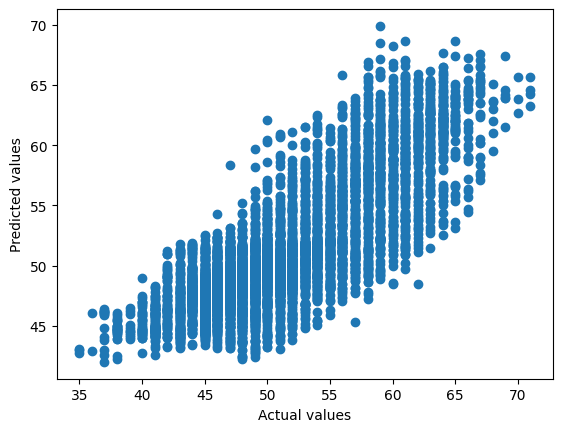

R-squared score: 0.67
Accuracy: 0.6678791511618157


In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()
r2_regression = r2_score(y_test, y_pred)
accuracy_regression = r2_score(y_test, y_pred)

print(f"R-squared score: {r2_regression:.2f}")
print("Accuracy:", accuracy_regression)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVR(kernel='linear')

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

r2_SVR = r2_score(y_test, y_pred)

print("R-squared: {:.2f}".format(r2_SVR))

accuracy_SVR = r2_score(y_test, y_pred)
print("Accuracy:", accuracy_SVR)


R-squared: 0.66
Accuracy: 0.6596606437009714


In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_xg = r2_score(y_test, y_pred)

print(f'R-squared: {r2_xg:.2f}')

accuracy_xg = r2_score(y_test, y_pred)
print("Accuracy:", accuracy_xg)


R-squared: 0.92
Accuracy: 0.9175096952860108


In [11]:
print("Accuracies of different ML models")
print("Accuracy for regression", accuracy_regression*100)
print("Accuracy for Random Forest", accuracy_randomForest*100)
print("Accuracy for SVR", accuracy_SVR*100)
print("Accuracy for XG Boost",accuracy_xg*100)

Accuracies of different ML models
Accuracy for regression 66.78791511618158
Accuracy for Random Forest 96.17985057623378
Accuracy for SVR 65.96606437009714
Accuracy for XG Boost 91.75096952860108


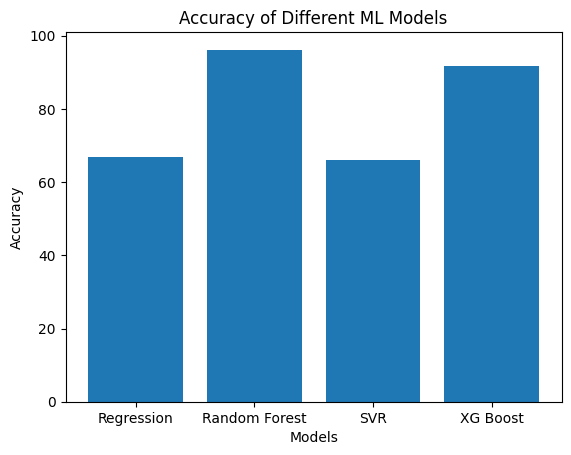

In [12]:
import matplotlib.pyplot as plt

model_names = ['Regression', 'Random Forest', 'SVR', 'XG Boost']
accuracies = [accuracy_regression*100, accuracy_randomForest*100, accuracy_SVR*100, accuracy_xg*100] 

plt.bar(model_names, accuracies)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')

plt.show()


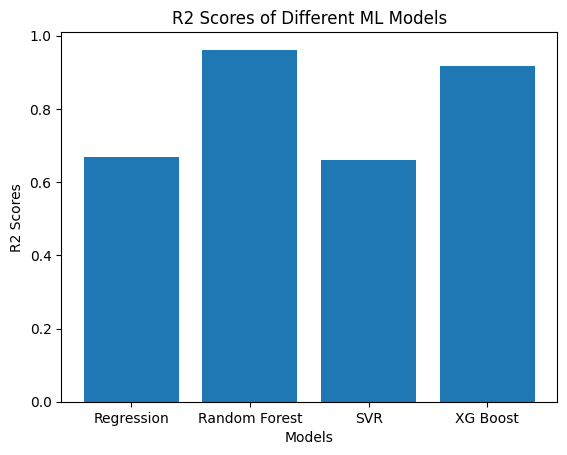

In [13]:
model_names = ['Regression', 'Random Forest', 'SVR', 'XG Boost']
accuracies = [r2_regression, r2_randomForest, r2_SVR, r2_xg] 

plt.bar(model_names, accuracies)

plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.title('R2 Scores of Different ML Models')

plt.show()